# # Checkpoint 1: Data Cleaning 1

#                                    Importing the libraries

In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt

In [2]:
#reading this like a CSV file is prone to error
#companies=pd.read_csv('companies.csv') 


In [3]:
# Correcting the encoding error as below
companies=pd.read_csv('companies.csv',encoding= 'unicode_escape')
rounds2=pd.read_csv('rounds2.csv',encoding= 'unicode_escape')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Table 1.1: Understand the Data Set 

#### 1. How many unique companies are present in rounds2?

In [6]:
#rounds2 has case sensitive Data
#Converting the case_sensitive data and extracting unique companies
print(rounds2.shape)
rounds2.company_permalink.str.lower().nunique()

(114949, 6)


66370

#### 2. How many unique companies are present in companies?

In [7]:
companies.name.str.lower().nunique()

66034

#### 3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [8]:
"""Ans: Permalink column can be used as the unique for the company. As company column has lower case as well"""

'Ans: Permalink column can be used as the unique for the company. As company column has lower case as well'

#### 4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [9]:
"""Ans : Yes, 66307>66099""" 

'Ans : Yes, 66307>66099'

###### 5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [10]:
#To use permalink column on both the Dataframes, renaming the column in rounds2 as permalink
rounds2['company_permalink']
rounds2.rename(columns = {'company_permalink':'permalink'}, inplace=True)

In [11]:
#MERGING THE DATAFRAMES ON COLUMN 'PERMALINK' 
rounds2['permalink']=rounds2.permalink.str.lower()
companies['permalink']=companies.permalink.str.lower()
master_frame=pd.merge(rounds2,companies,how='left',on='permalink')

In [12]:
master_frame.head(5)
print(master_frame.shape)

(114949, 15)


In [13]:
#Finding the missing values
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

# Checkpoint 2: Funding Type Analysis

## Table 2.1 Representative Values of Investments for Each of these Funding Types

In [14]:
#Finding the Funding amount for venture type
#Clean the data by clearing missing values and consider only for the companies which are operating and in IPO

In [15]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

###### DATA CLEANING

In [16]:
#As per the constraints of Spark Funds, we have decide based on only 4 funding types. Eliminating the other funding types
master_frame=master_frame[master_frame.funding_round_type.isin(['venture', 'seed','angel','private_equity'])]

In [17]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

  Removing the Missing Values

In [18]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         63277
funded_at                      0
raised_amount_usd          13770
name                           8
homepage_url                4150
category_list               2501
status                         7
country_code                7321
state_code                  9279
region                      8559
city                        8556
founded_at                 16725
dtype: int64

In [19]:
#The whole analysis is based on RAISED_AMOUNT_USD. There are 13770 MISSING VALUES.

In [20]:
master_frame=master_frame[-(master_frame['raised_amount_usd'].isnull())]

In [21]:
master_frame.status.unique()

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

In [22]:
#Removing the rows which are having CLOSED,NAN,ACQUIRED
master_frame=master_frame[master_frame.status.isin(['operating', 'ipo'])]
master_frame.status.unique()

array(['operating', 'ipo'], dtype=object)

In [23]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         44497
funded_at                      0
raised_amount_usd              0
name                           0
homepage_url                2495
category_list                503
status                         0
country_code                3733
state_code                  5089
region                      4631
city                        4628
founded_at                 10240
dtype: int64

In [24]:
#Removing the NOT REQUIRED RELEVANT DATA COLUMNS FOR OUR INVESTMENT ANALYSIS
master_frame = master_frame.drop(['permalink', 'funding_round_permalink', 'funding_round_code', 'funded_at', 
                                  'status', 'homepage_url', 'state_code', 'region', 'city', 'founded_at'], axis = 1)

In [25]:
master_frame.isnull().sum()

funding_round_type       0
raised_amount_usd        0
name                     0
category_list          503
country_code          3733
dtype: int64

In [26]:
master_frame[master_frame.category_list.isnull() & master_frame.country_code.isnull()]

,funding_round_type,raised_amount_usd,name,category_list,country_code
133,venture,10000000.0,17 Media,NaN,NaN
571,venture,13660000.0,4-Antibody AG,NaN,NaN
666,seed,500000.0,4theTable,NaN,NaN
1294,seed,500000.0,Abovo42 Corporation,NaN,NaN
1308,seed,200000.0,ABSENTIA,NaN,NaN
...,...,...,...,...,...
113109,angel,250000.0,YOU Global LTD,NaN,NaN
113110,angel,220000.0,YOU Global LTD,NaN,NaN
113408,seed,30000.0,Yustiz,NaN,NaN
113488,venture,20000000.0,Zairmail,NaN,NaN


In [27]:
#As counntry is NaN and Category List is NaN, we cannot determine if this is true data and we can invest in this or not
master_frame = master_frame[-(master_frame.category_list.isnull() | master_frame.country_code.isnull())]

In [28]:
master_frame.isnull().sum()

funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
dtype: int64

In [29]:
#For readability converting into Millions
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda x: x/1000000)
master_frame.head()

,funding_round_type,raised_amount_usd,name,category_list,country_code
0,venture,10.000000,#fame,Media,IND
2,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,venture,2.000000,0-6.com,Curated Web,CHN
7,seed,0.043360,Ondine Biomedical Inc.,Biotechnology,CAN
8,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


In [30]:
Mean_value=master_frame.groupby('funding_round_type').mean()
Mean_value

,raised_amount_usd
funding_round_type,
angel,0.991179
private_equity,75.828605
seed,0.753560
venture,11.758410


<AxesSubplot:xlabel='funding_round_type'>

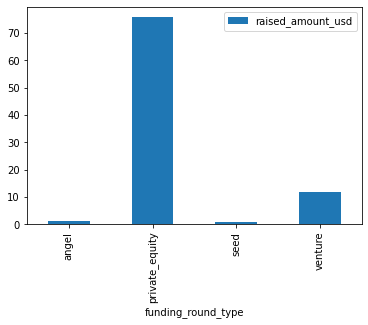

In [31]:
Mean_value.plot.bar()

###### 1. Representative funding amount of venture type


In [32]:
Venture_fund = round(Mean_value.iloc[3][0], 2)
print(Venture_fund)

11.76


###### 2. Representative funding amount of angel type

In [33]:
Angel_fund = round(Mean_value.iloc[0][0], 2)
print(Angel_fund)

0.99


###### 3.Representative funding amount of seed type

In [34]:
Seed_fund = round(Mean_value.iloc[2][0], 2)
print(Seed_fund)

0.75


###### 4.Representative funding amount of private equity type

In [35]:
Equity_fund = round(Mean_value.iloc[1][0], 2)
print(Equity_fund)

75.83


###### 5.Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

Ans: 5 to 15 USD falls under Venture_Fund (11.76)

In [36]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

# Country Analysis

## Table -  3.1	 Analysing the Top 3 English-Speaking Countries		

<AxesSubplot:xlabel='country_code', ylabel='Amount in Mill [$]'>

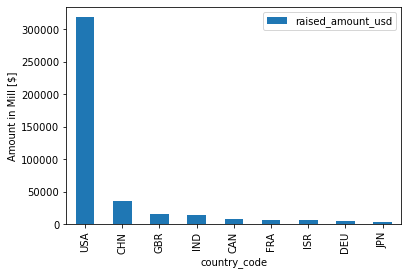

In [37]:
top9=master_frame.groupby('country_code').sum().sort_values("raised_amount_usd", ascending=False).iloc[0:9]
#top9["raised_amount_usd"] = top9['raised_amount_usd'].apply(lambda x: x/100000)
#top9.head(10)
top9.plot.bar(ylabel='Amount in Mill [$]')

In [38]:
#USA & GBR & INDIA as per the wikipedia are 3  OFFICALLY ENGLISH SPEAKING COUNTRIES

In [39]:
master_frame=master_frame[master_frame.country_code.isin(['USA', 'GBR', 'IND'])]
master_frame.drop('funding_round_type', axis=1, inplace=True)

###### 1. Top English speaking country

Answer USA

###### 2.Second English speaking country


Answer : GBR

###### 3. Third English speaking country


Answer : IND

## Checkpoint 4: Sector Analysis 1

In [40]:
mapping = pd.read_csv('mapping.csv')
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [41]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [42]:
#Dropping the null value
mapping = mapping[-(mapping.category_list.isnull())]
mapping.isnull().sum()
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [43]:
#mapping.columns
mapping=mapping.melt(id_vars="category_list", value_vars=['Automotive & Sports', 'Cleantech / Semiconductors', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])
#mf.head(5)

In [44]:
mapping.head(5)

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [45]:
mapping[mapping.value==1]

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
7486,Social Recruiting,"Social, Finance, Analytics, Advertising",1
7487,Social Television,"Social, Finance, Analytics, Advertising",1
7488,Social Travel,"Social, Finance, Analytics, Advertising",1
7499,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [46]:
mapping=mapping[mapping.value==1]

In [47]:
mapping.drop('value', axis=1,inplace = True)

In [48]:
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head(5)


,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [49]:
#To create a derivative column primary_sector for sector analysis
master_frame['primary_sector']=master_frame['category_list'].astype("str").apply(lambda x: x.split('|')[0])
master_frame.head()

,raised_amount_usd,name,category_list,country_code,primary_sector
0,10.0,#fame,Media,IND,Media
10,20.0,H2O.ai,Analytics,USA,Analytics
11,1.7,H2O.ai,Analytics,USA,Analytics
12,8.9,H2O.ai,Analytics,USA,Analytics
28,4.0,10 Minutes With,Education,GBR,Education


In [51]:
merged_df=pd.merge(master_frame, mapping, how="left", on='category_list')
merged_df.shape

(35232, 6)

In [52]:
merged_df[merged_df.main_sector.isnull()]

,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
1,20.000,H2O.ai,Analytics,USA,Analytics,NaN
2,1.700,H2O.ai,Analytics,USA,Analytics,NaN
3,8.900,H2O.ai,Analytics,USA,Analytics,NaN
9,3.530,Redox,Health Care|Health Care Information Technology...,USA,Health Care,NaN
10,55.000,10X Genomics,Biotechnology|Technology,USA,Biotechnology,NaN
...,...,...,...,...,...,...
35216,25.000,Zynga,Facebook Applications|Games|Networking|Technology,USA,Facebook Applications,NaN
35217,15.000,Zynga,Facebook Applications|Games|Networking|Technology,USA,Facebook Applications,NaN
35218,490.000,Zynga,Facebook Applications|Games|Networking|Technology,USA,Facebook Applications,NaN
35219,300.000,Zynga,Facebook Applications|Games|Networking|Technology,USA,Facebook Applications,NaN


In [53]:
#Some of the NAN can be mapped to main_sector, REDUNDANT NULL VALUES
#Pseudo Code if logic
#if merged_df.main_sector_isnull():
#    if  merged_df.primary_sector.isin(['Analytics', 'Advertising', 'Finance', 'Social']):
#    merged_df['main_sector'] = 'Social, Finance, Analytics, Advertising'
#    elif merged_df.primary_sector.isin(['News', 'Search', 'Messaging']):
#        merged_df['main_sector'] = 'News, Search and Messaging'
#        elif merged_df.primary_sector.isin(['Cleantech', 'Semiconductors']):
#            merged_df['main_sector'] = 'Cleantech / Semiconductors'

#merged_df.fillna("No sector", inplace=True)
merged_df.loc[merged_df.main_sector.isnull() &
              merged_df.primary_sector.isin(['Analytics', 'Advertising', 'Finance', 'Social']), "main_sector"] = 'Social, Finance, Analytics, Advertising'
merged_df.loc[merged_df.main_sector.isnull() & 
              merged_df.primary_sector.isin(['News', 'Search', 'Messaging']), "main_sector"] = 'News, Search and Messaging'
merged_df.loc[merged_df.main_sector.isnull() & 
              merged_df.primary_sector.isin(['Cleantech', 'Semiconductors']), "main_sector"] = "Cleantech / Semiconductors"
merged_df.head(10)


,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,10.000000,#fame,Media,IND,Media,Entertainment
1,20.000000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,1.700000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,4.000000,10 Minutes With,Education,GBR,Education,Others
5,0.265940,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
6,2.906832,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
7,1.500000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
8,0.642000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
9,3.530000,Redox,Health Care|Health Care Information Technology...,USA,Health Care,NaN


In [54]:
#As per the mapping CSV, only the main 8 sectors are given.
#Hence, removing the NaN values from master_frame after merging
master_frame =merged_df[-(merged_df.main_sector.isnull())]
merged_df.head(10)

,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,10.000000,#fame,Media,IND,Media,Entertainment
1,20.000000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,1.700000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,4.000000,10 Minutes With,Education,GBR,Education,Others
5,0.265940,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
6,2.906832,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
7,1.500000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
8,0.642000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
9,3.530000,Redox,Health Care|Health Care Information Technology...,USA,Health Care,NaN


In [55]:
master_frame.isnull().sum()

raised_amount_usd    0
name                 0
category_list        0
country_code         0
primary_sector       0
main_sector          0
dtype: int64

## Checkpoint 5: Sector Analysis 2

###### Three data frames D1, D2 and D3 

In [56]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

D1.head(10)

,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
3,8.90,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
16,15.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
17,5.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
18,5.15,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
19,12.40,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
20,6.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
34,15.00,1stdibs,E-Commerce,USA,E-Commerce,Others
42,8.00,2080 Media,News,USA,News,"News, Search and Messaging"
45,7.20,2080 Media,News,USA,News,"News, Search and Messaging"
51,10.00,22nd Century Group,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors


In [57]:
D1_f = master_frame.loc[:, ['country_code', 'main_sector']]
#D2_f = D2.loc[:, ['country_code', 'main_sector']]
D1_f['raised_amount_usd']= master_frame['raised_amount_usd'].apply(lambda x: x)
D1_f.groupby(['main_sector', 'country_code']).sum().sort_values(by=['country_code', 'raised_amount_usd'], ascending=False)

,,raised_amount_usd
main_sector,country_code,
Cleantech / Semiconductors,USA,141400.564958
Others,USA,32651.518206
"Social, Finance, Analytics, Advertising",USA,31011.004859
Health,USA,14896.362252
Manufacturing,USA,8267.939722
"News, Search and Messaging",USA,8177.704030
Entertainment,USA,3330.042888
Automotive & Sports,USA,1255.329578
Others,IND,2122.156766


###### 1. Total number of investments (count) 

In [62]:
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').count().sort_values(by='raised_amount_usd', ascending=False)
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').count().sort_values(by='raised_amount_usd', ascending=False)
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').count().sort_values(by='raised_amount_usd', ascending=False)


<AxesSubplot:ylabel='main_sector'>

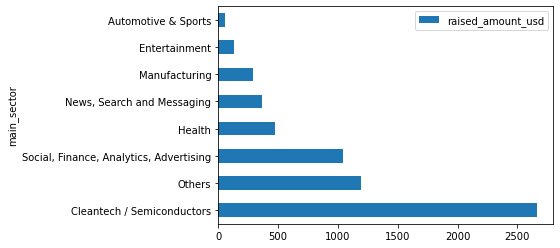

In [63]:
D1_gr.plot.barh()

                                         raised_amount_usd
main_sector                                               
Cleantech / Semiconductors                             166
Others                                                  77
Social, Finance, Analytics, Advertising                 58
Manufacturing                                           29
Entertainment                                           27
News, Search and Messaging                              15
Health                                                  13
Automotive & Sports                                      4


<AxesSubplot:ylabel='main_sector'>

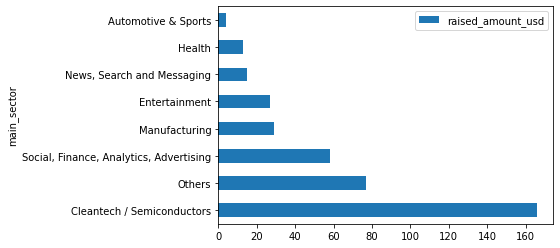

In [64]:
print(D2_gr)
D2_gr.plot.barh()

                                         raised_amount_usd
main_sector                                               
Others                                                  65
Social, Finance, Analytics, Advertising                 34
News, Search and Messaging                              30
Cleantech / Semiconductors                              28
Entertainment                                           18
Health                                                  12
Manufacturing                                           11
Automotive & Sports                                      4


<AxesSubplot:ylabel='main_sector'>

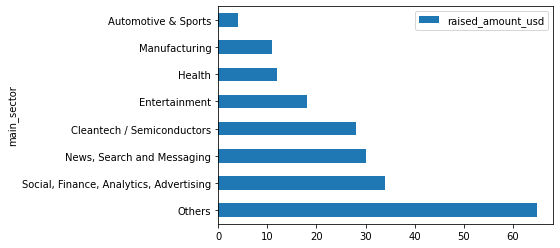

In [61]:
print(D3_gr)
D3_gr.plot.barh()

###### 2. Total amount of investment (USD)

In [68]:
print(D1.groupby('main_sector').sum().sort_values(by='raised_amount_usd', ascending= False))
print(D2.groupby('main_sector').sum().sort_values(by='raised_amount_usd', ascending= False))
print(D3.groupby('main_sector').sum().sort_values(by='raised_amount_usd', ascending= False))

                                         raised_amount_usd
main_sector                                               
Cleantech / Semiconductors                    23954.117261
Others                                        10627.792566
Social, Finance, Analytics, Advertising        9114.882335
Health                                         4245.673703
News, Search and Messaging                     3171.152904
Manufacturing                                  2616.309634
Entertainment                                  1121.877561
Automotive & Sports                             400.805688
                                         raised_amount_usd
main_sector                                               
Cleantech / Semiconductors                     1448.331132
Others                                          673.403399
Social, Finance, Analytics, Advertising         488.296136
Manufacturing                                   257.049312
Entertainment                                   238.4614

<AxesSubplot:ylabel='main_sector'>

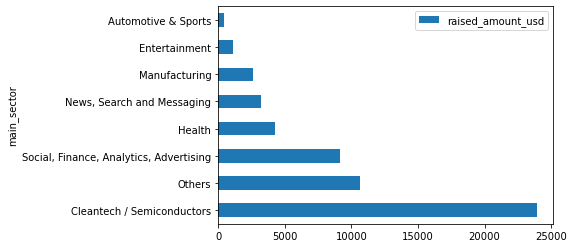

In [61]:
D1.groupby('main_sector').sum().sort_values(by='raised_amount_usd', ascending= False).plot.barh()

<AxesSubplot:ylabel='main_sector'>

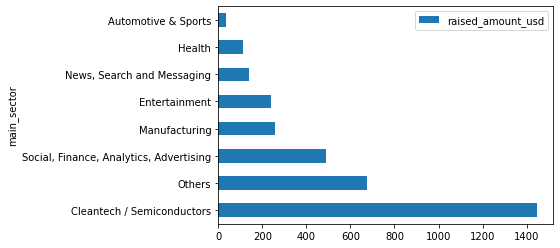

In [62]:

D2.groupby('main_sector').sum().sort_values(by='raised_amount_usd', ascending= False).plot.barh()

<AxesSubplot:ylabel='main_sector'>

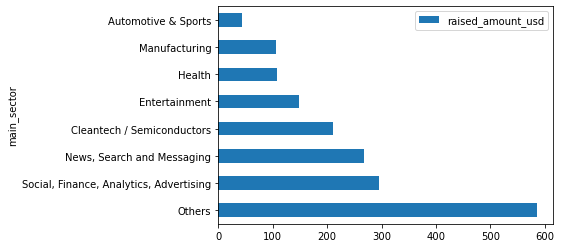

In [63]:

D3.groupby('main_sector').sum().sort_values(by='raised_amount_usd', ascending= False).plot.barh()

###### 3. Top sector (based on count of investments)

###### 4. Second-best sector (based on count of investments)

###### 5. Third-best sector (based on count of investments)

###### 9. For the top sector count-wise (point 3), which company received the highest investment? for USA

In [64]:
D1_gr.head(2)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,2666
Others,1196


In [65]:
company= D1[D1['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

             raised_amount_usd
name                          
Tigo Energy         137.478992


In [66]:
company= D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                   raised_amount_usd
name                                
Capella Photonics          54.968051


In [67]:
D2_gr.head(2)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,166
Others,77


In [68]:
company= D2[D2['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

         raised_amount_usd
name                      
Elixent               50.0


In [69]:
company= D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                raised_amount_usd
name                             
Electric Cloud               37.0


In [70]:
D3_gr.head(2)

,raised_amount_usd
main_sector,
Others,65
"Social, Finance, Analytics, Advertising",34


In [71]:
company= D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

              raised_amount_usd
name                           
FirstCry.com               39.0


In [72]:
company= D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                 raised_amount_usd
name                              
Manthan Systems               50.7


###### Analysis Result :
#### Based on the data analysis performed, SparksFunds should invest in -

Funding type - Venture.

Countries - USA, Britain and India, respectively.

Top two sectors to invest in are - Others and Cleantech / Semiconductors  